# Stress Level Prediction Using Machine Learning

The primary aim of stress level prediction using machine learning is to identify signs of stress in written communication, enabling early detection before it escalates into serious health concerns. The model is designed to analyze individual patterns of stress, offering tailored suggestions for managing stress more effectively.



## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a crucial step in data science and machine learning projects. It helps us understand the data before applying any modeling techniques. The primary objectives of EDA are to:

Understand the structure of the dataset (features, types, missing values, etc.).
Detect outliers or anomalies in the data.
Visualize relationships between variables.
Prepare data for further analysis by handling missing data, transforming features, etc.
In this case, the code provided involves some key steps of EDA, such as inspecting data, checking for missing values, and visualizing data distribution.

The code follows these steps for EDA:

- Initial dataset inspection using .head().
- Handling missing data by checking for null values.
- Understanding the distribution of categorical variables using .value_counts().
- Visualizing the relationship between labels and subreddits with a countplot.


These steps are commonly performed to get an initial understanding of the data and prepare it for further modeling or analysis.








This assumes that the labels (e.g., 1 for "Stressed" and 0 for "Not Stressed") are being plotted in reverse order compared to the usual default.
labels=['Stressed', 'Not Stressed']

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_path = "Stress.csv"

In [ ]:
data = pd.read_csv(data_path)

In [ ]:
data.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


Text(0.5, 1.0, 'Distribution of Labels')

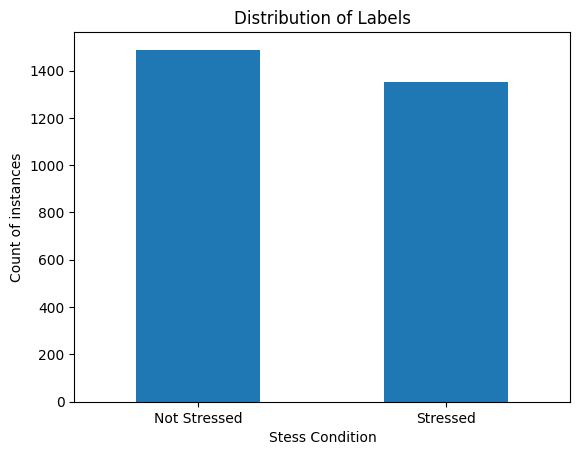

In [ ]:
ax = data.label.value_counts().plot(kind='bar')
ax.set_xticks(ticks=[1,0],labels=['Stressed','Not Stressed'],rotation=0)
plt.ylabel('Count of instances')
plt.xlabel('Stess Condition')
plt.title('Distribution of Labels')


In [ ]:
data.isna().sum()

,0
subreddit,0
post_id,0
sentence_range,0
text,0
label,0
confidence,0
social_timestamp,0


In [ ]:
data.subreddit.value_counts()


,count
subreddit,
ptsd,584
relationships,552
anxiety,503
domesticviolence,316
assistance,289
survivorsofabuse,245
homeless,168
almosthomeless,80
stress,64


<ipython-input-11-8be5d354696a>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(labels=['Not Stressed','Stressed'],rotation=0)


[Text(0, 0, 'Not Stressed'), Text(1, 0, 'Stressed')]

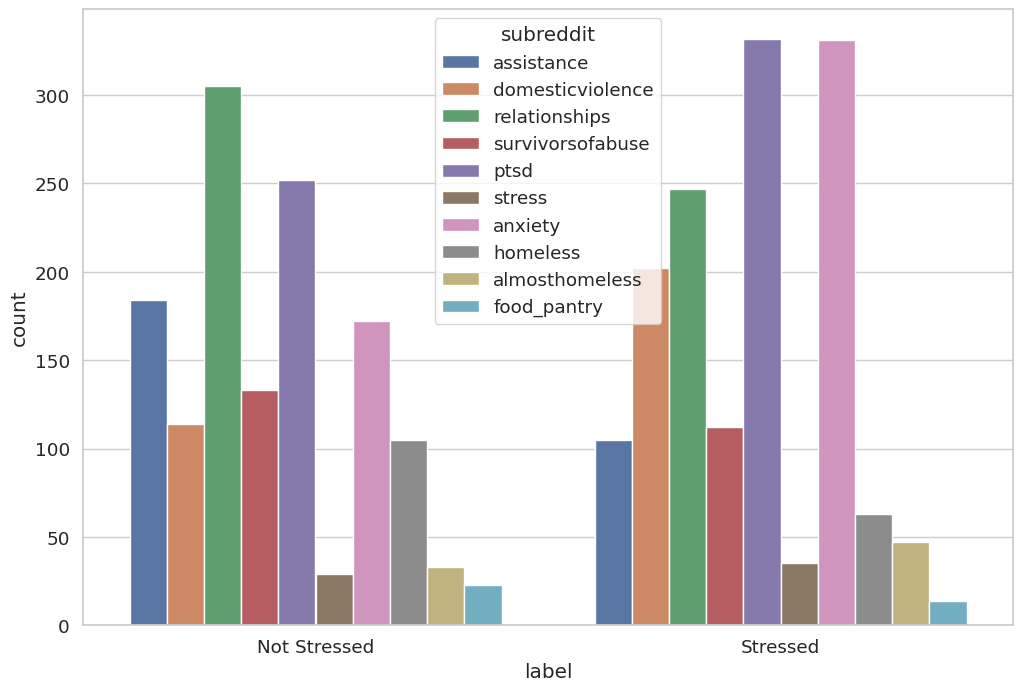

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "label", hue = "subreddit" , data = data)
#chart.set_xticklabels(chart.get_xticklabels(),rotation=0)
chart.set_xticklabels(labels=['Not Stressed','Stressed'],rotation=0)

**Feature engineering:**

Feature engineering is the process of transforming raw data into meaningful features that can be used to improve the performance of machine learning models. It involves selecting, modifying, and creating new features from the existing data to help the model learn more effectively.

Key Steps in Feature Engineering:

**1. Handle Missing Data:**
    
    Impute missing values (mean, median, mode, etc.) or remove rows/columns with too many missing values.
**2. Encoding Categorical Variables:**
     
     Convert categories into numerical values using one-hot encoding or label encoding
**3. Outlier Handling:**

    Remove or transform outliers identified during EDA to prevent them from negatively impacting model training.
**4. Create New Features:**

    Use insights from EDA to create interaction terms, polynomial features, or extract information from dates, text, or other complex data types.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from scipy.sparse import hstack
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import VotingClassifier


# Prepare the data
X = data['text']
y = data['label']

# 1. TF-IDF Vectorization with n-grams and stop word removal
tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(X)  # Transform the entire dataset's text

# 2. One-hot encode metadata (e.g., 'subreddit') on the entire dataset
subreddit_ohe = OneHotEncoder(sparse_output=False)
X_subreddit = subreddit_ohe.fit_transform(data[['subreddit']])  # One-hot encode the entire subreddit column

# 3. Concatenate TF-IDF features with one-hot encoded 'subreddit'
X_full = hstack([X_tfidf, X_subreddit])


# 4. Split the full concatenated data (X_full) and labels (y) into train and test sets
X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)


# Ensemble Learning

Ensemble learning refers to combining multiple machine learning models to improve overall performance, typically by reducing variance, bias, or improving generalization. The key idea is that a group of weak models can come together to form a strong predictive model. The ensemble model tends to outperform individual models by averaging out their errors or combining their predictions.

## Types of Ensemble Learning:

### Bagging (Bootstrap Aggregating):

* Multiple instances of the same model (like decision trees) are trained on different random samples of the training data.
* Example: Random Forest combines multiple decision trees by averaging their outputs (for regression) or using majority voting (for classification).
* Advantage: Reduces variance and overfitting.

### Boosting:

* Sequentially trains models, where each new model focuses on correcting errors made by the previous ones.
* Example: Gradient Boosting fits models incrementally, using the errors of the previous models to create a better prediction.
* Advantage: Reduces bias and improves accuracy.

### Voting:

* Combines predictions from different types of models (e.g., decision trees, logistic regression, support vector machines) and aggregates their results.
* Soft voting averages the predicted probabilities, while hard voting chooses the majority class.
* Advantage: Combines strengths of different models for better predictions.


## Grid Search
* Grid Search is a hyperparameter tuning technique that systematically tests different combinations of parameters to find the best-performing configuration.
* It evaluates each combination using cross-validation to ensure that the selected hyperparameters generalize well.

## Model Selection
Model selection refers to choosing the best model or combination of models based on performance metrics. It often involves:

* Grid Search: To find optimal hyperparameters.
* Cross-Validation: To prevent overfitting and ensure the model's robustness across different data splits.

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from scipy.sparse import hstack
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import VotingClassifier
import pickle

# Handle class imbalance using SMOTE (optional, if imbalance exists)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_full, y_train)

# Random Forest Classifier with hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
rf_model.fit(X_train_balanced, y_train_balanced)
rf_pred = rf_model.predict(X_test_full)

print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred)}")
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

# Save the model as a pickle file
filename = 'random_forest_iris.pkl'
with open(filename, 'wb') as file:
     pickle.dump(rf_model, file)

print(f"Model saved as: {filename}")

# Support Vector Machine Classifier with default parameters
svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train_full, y_train)
svm_pred = svm_model.predict(X_test_full)

print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred)}")
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_full, y_train)
xgb_pred = xgb_model.predict(X_test_full)

print(f"XGBoost Accuracy: {accuracy_score(y_test, xgb_pred)}")
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))


Random Forest Accuracy: 0.704225352112676
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.62      0.66       263
           1       0.70      0.78      0.74       305

    accuracy                           0.70       568
   macro avg       0.70      0.70      0.70       568
weighted avg       0.70      0.70      0.70       568

Model saved as: random_forest_iris.pkl
SVM Accuracy: 0.6690140845070423
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64       263
           1       0.69      0.70      0.70       305

    accuracy                           0.67       568
   macro avg       0.67      0.67      0.67       568
weighted avg       0.67      0.67      0.67       568



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:40:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.6778169014084507
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       263
           1       0.70      0.71      0.70       305

    accuracy                           0.68       568
   macro avg       0.68      0.68      0.68       568
weighted avg       0.68      0.68      0.68       568



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

df = data.dropna()

# Convert non-numeric columns to numeric using one-hot encoding
df = pd.get_dummies(df)
X = df.drop('label', axis=1)
y = df['label']

# Feature scaling (after handling missing values and non-numeric columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Feature selection using SelectKBest (choosing top 10 features)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Define models for GridSearchCV
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Define parameter grids for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Grid Search for RandomForest
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_selected, y_train)
best_rf = grid_rf.best_estimator_

# Grid Search for GradientBoosting
grid_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_gb.fit(X_train_selected, y_train)
best_gb = grid_gb.best_estimator_

# Ensemble: Voting Classifier with the best models
ensemble = VotingClassifier(estimators=[('rf', best_rf), ('gb', best_gb)], voting='soft')
ensemble.fit(X_train_selected, y_train)

# Predictions and evaluation
y_pred = ensemble.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display best parameters
print("Best RandomForest params:", grid_rf.best_params_)
print("Best GradientBoosting params:", grid_gb.best_params_)


Accuracy: 0.5751173708920188
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.44      0.50       414
           1       0.57      0.70      0.63       438

    accuracy                           0.58       852
   macro avg       0.58      0.57      0.57       852
weighted avg       0.58      0.58      0.57       852

Best RandomForest params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best GradientBoosting params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


# Key NLP Concepts: Tokenization, TF-IDF, BERT, and RoBERTa

## Tokenization
Tokenization is the process of breaking down text into smaller units, called tokens, which can be words, subwords, or characters. Tokenizers like BERT's WordPiece help in handling rare words by splitting them into subwords. For example, "unhappiness" may be tokenized as ["un", "##happiness"]. Tokenization is essential for converting raw text into a format that machine learning models can process effectively.


![](https://miro.medium.com/v2/resize:fit:2000/1*pj8KnjxgCszpDqJSS2741w.jpeg)



## TF-IDF (Term Frequency-Inverse Document Frequency)
TF-IDF is a traditional method for representing text, often used in simpler models. It works by calculating:
- **Term Frequency (TF):** How often a word appears in a document.
- **Inverse Document Frequency (IDF):** How unique a word is across all documents.
The TF-IDF score helps to identify important words in a document while reducing the influence of common, less informative words. While effective for smaller datasets, it lacks the ability to capture context or semantic meaning in the text.

## BERT (Bidirectional Encoder Representations from Transformers)
BERT is a transformer-based model designed to understand the context of a word by looking at both the words before and after it (bidirectional). BERT is pre-trained on two tasks:
1. **Masked Language Model (MLM):** Predicts masked words in a sentence.
2. **Next Sentence Prediction (NSP):** Determines whether one sentence logically follows another.
BERT has revolutionized NLP by capturing the deeper context of words and providing superior performance on various tasks like text classification and question answering.

## RoBERTa (Robustly Optimized BERT Approach)
RoBERTa is a variant of BERT that improves upon BERT's training process by removing the Next Sentence Prediction (NSP) task and training on more data with longer sequences. It is pre-trained using only the **Masked Language Modeling (MLM)** task, and its optimized training makes it more effective for downstream NLP tasks. RoBERTa excels in extracting textual patterns and can be fine-tuned for specific tasks like sentiment analysis or question answering without needing labeled data.


In [ ]:
# Import necessary libraries
import torch
from transformers import BertTokenizer, BertModel, RobertaTokenizer, RobertaModel

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Function to get BERT embeddings
def get_bert_embeddings(text):
    # Load pre-trained BERT tokenizer and model
    bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)

    # Tokenize input text and convert to tensor
    inputs = bert_tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)

    # Get BERT embeddings
    with torch.no_grad():
        outputs = bert_model(**inputs)

    # The last_hidden_state contains the embeddings for each token
    # We can average them to get a single vector for the entire sentence
    embeddings = outputs.last_hidden_state.mean(dim=1)

    return embeddings.cpu().numpy()

# Function to get RoBERTa embeddings
def get_roberta_embeddings(text):
    # Load pre-trained RoBERTa tokenizer and model
    roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
    roberta_model = RobertaModel.from_pretrained('roberta-base').to(device)

    # Tokenize input text and convert to tensor
    inputs = roberta_tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)

    # Get RoBERTa embeddings
    with torch.no_grad():
        outputs = roberta_model(**inputs)

    # The last_hidden_state contains the embeddings for each token
    # We can average them to get a single vector for the entire sentence
    embeddings = outputs.last_hidden_state.mean(dim=1)

    return embeddings.cpu().numpy()

# Example usage for sentiment analysis text
text = ["I love this product!", "This is the worst movie I've seen."]
print("BERT Embeddings:")
for sentence in text:
    bert_embedding = get_bert_embeddings(sentence)
    print(bert_embedding)

print("\nRoBERTa Embeddings:")
for sentence in text:
    roberta_embedding = get_roberta_embeddings(sentence)
    print(roberta_embedding)


BERT Embeddings:


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

[[ 4.28236932e-01  3.95126604e-02  1.89057425e-01 -1.32963061e-01
   4.80976552e-01 -2.15796545e-01  3.96534018e-02  7.97804892e-01
   3.10531892e-02 -3.24670762e-01  1.55128568e-01 -5.38734913e-01
   1.80768758e-01  6.95393384e-01 -2.33609248e-02  7.33366683e-02
   6.84464499e-02  2.79111117e-01  2.19372377e-01  3.85036260e-01
  -1.36365235e-01 -1.89044043e-01 -8.51027966e-02  4.93602425e-01
   5.18103540e-01 -7.56896585e-02  1.43060446e-01  3.17409411e-02
   1.77199021e-01 -1.17889166e-01  2.50111789e-01  4.65806127e-02
  -4.20398451e-02 -2.80873310e-02 -1.51251107e-01 -2.42938846e-01
  -3.16369027e-01  6.69972831e-03 -4.32276338e-01 -2.01033607e-01
  -1.97683483e-01 -3.36957037e-01  4.87458080e-01 -1.69765368e-01
   2.46977583e-01 -3.56833518e-01 -3.76376450e-01  1.20143615e-01
   5.90208657e-02  4.63989638e-02  4.33433466e-02  2.58973509e-01
  -4.30851668e-01 -1.48436099e-01  1.10111423e-01  1.93390369e-01
  -5.62438607e-01 -3.94324988e-01 -1.28817484e-01 -4.28001657e-02
  -1.70106

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[[-3.52022760e-02  9.84995887e-02 -1.32922856e-02 -1.68200240e-01
   1.08606152e-01  1.16155371e-01 -1.39136529e-02  4.63227890e-02
   2.21915077e-03 -5.02172578e-03 -1.39013767e-01 -9.73985568e-02
  -2.26034736e-03 -8.29033330e-02 -1.22352712e-01 -4.13814373e-02
   2.19445694e-02 -1.13798007e-01  6.58621937e-02  1.25290707e-01
  -1.00519799e-01  5.09560034e-02  3.15043516e-02  5.94756417e-02
  -5.64648733e-02  2.91486420e-02  1.32133096e-01 -4.62208269e-03
  -6.90910546e-03 -1.43934175e-01 -1.72547549e-01  5.45762153e-03
   5.02786934e-02  8.24334472e-02 -4.95891310e-02 -6.67400332e-03
   9.19830725e-02 -3.73293981e-02  2.86834072e-02  1.09905063e-03
   3.93424965e-02 -2.40000099e-01  8.62243213e-03 -4.54532877e-02
   4.81360890e-02  5.67358322e-02 -8.86597186e-02 -1.58182070e-01
   3.62895243e-02 -6.23088814e-02 -6.64374307e-02  2.00075712e-02
   6.63529709e-02 -4.04696688e-02 -2.34416835e-02  1.11019984e-01
   4.60523963e-02  9.30326134e-02  8.14751536e-02  1.07388988e-01
   5.38020

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[[-6.57050982e-02  4.10089269e-02  2.02338826e-02 -7.11569265e-02
   1.04980846e-03  3.06318164e-01 -5.41578839e-03  5.01561016e-02
  -1.60505846e-02 -4.76924442e-02 -6.79106787e-02 -3.01852282e-02
   1.79288387e-02  3.15997452e-02  7.22009838e-02 -1.20928571e-01
  -1.09668843e-01 -1.47066608e-01  1.07185654e-01 -1.08227441e-02
  -9.57220718e-02  1.05760105e-01  8.84225033e-03  9.96995419e-02
   2.57988200e-02  3.50222029e-02  1.39518723e-01  6.20784983e-02
  -1.33721123e-03  6.41916543e-02 -2.05443919e-01 -2.43936405e-02
  -2.58178487e-02  9.29490626e-02 -1.40606414e-03 -2.54465762e-04
   1.58258826e-01  3.69066000e-03  2.27599919e-01 -1.74983044e-03
   2.71605283e-01  2.02198755e-02 -1.75320640e-01 -8.95217732e-02
   3.22041474e-02 -6.42085373e-02 -2.29608193e-01 -2.28784412e-01
   2.35348325e-02  8.43010843e-03 -4.10321131e-02  1.58114567e-01
   3.53843831e-02  3.28258947e-02 -1.12754032e-01  2.80355494e-02
  -8.80029146e-03  2.68835369e-02  1.00010514e-01 -9.85657498e-02
   2.91739

In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample data for sentiment analysis (1 = positive, 0 = negative)
texts = [
    "I love this product, it's amazing!",
    "This is the best movie I've ever seen.",
    "Absolutely terrible, I hated every minute of it.",
    "Worst experience, totally disappointing.",
    "Great quality, I will definitely buy again.",
    "Not what I expected, very bad product."
]
labels = [1, 1, 0, 0, 1, 0]  # 1 for positive, 0 for negative sentiment

# Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Convert text to TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(texts)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, labels, test_size=0.2, random_state=42)

# Initialize and train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict the sentiment of the test data
y_pred = classifier.predict(X_test)

# Output accuracy
accuracy = accuracy_score(y_test, y_pred)

# Example of using TF-IDF for text embedding
new_text = ["I don't think I am so stressed !", "I  feel good ."]
new_tfidf = vectorizer.transform(new_text)

# Predict the sentiment for the new text
new_predictions = classifier.predict(new_tfidf)
for text, pred in zip(new_text, new_predictions):
    sentiment = "Stressed" if pred == 1 else "Not stressed"
    print(f"Text: '{text}' -> Sentiment: {sentiment}")


Text: 'I don't think I am so stressed !' -> Sentiment: Not stressed
Text: 'I  feel good .' -> Sentiment: Not stressed


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Neural networks are a class of machine learning models inspired by the human brain's structure and function. They are composed of layers of interconnected nodes, called neurons, which work together to process input data and generate predictions or classifications. Neural networks are the backbone of many modern AI applications, particularly in tasks like image recognition, natural language processing, and pattern detection.



![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20230602113310/Neural-Networks-Architecture.png)

### Structure of Neural Networks
At the core of a neural network is the layered architecture:

**Input layer**: Receives the raw data (e.g., images, text, etc.) and passes it on to the next layer.

**Hidden layers**: Consists of one or more layers where neurons apply mathematical transformations to the input data. These layers capture the complex patterns in the data.

**Output layer**: Produces the final prediction or classification.
Each neuron in a layer receives inputs from neurons in the previous layer, processes them using a weighted sum and an activation function, and sends the result to the next layer. The activation function introduces non-linearity, allowing neural networks to model complex relationships.

### Learning Process
Neural networks learn by adjusting the weights of connections between neurons. This is done through an iterative process called backpropagation, which minimizes the error between predicted and actual outputs. The network's parameters (weights and biases) are updated using an optimization algorithm like gradient descent, allowing the model to improve its performance over time.

### Types of Neural Networks
**Feedforward Neural Networks (FNNs)**: The simplest type, where information moves in one direction from input to output.

**Convolutional Neural Networks (CNNs)**: Primarily used in image processing tasks, CNNs apply convolution operations to capture spatial hierarchies in data.

**Recurrent Neural Networks (RNNs)**: Designed for sequential data, RNNs maintain a memory of previous inputs, making them suitable for time series and language tasks.

**Generative Neural Networks (GANs)**: A class of networks that generates new data samples by learning the distribution of the input data.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import numpy as np

# Load the dataset
# file_path = 'Stress.csv'
# data = pd.read_csv(file_path)

# Prepare the data
X = data['text']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. TF-IDF Vectorization
tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Convert sparse matrices to dense because neural networks work with dense inputs
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

# 2. Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_dense, y_train)

# Convert labels to categorical (one-hot encoding)
y_train_balanced = to_categorical(y_train_balanced, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# 3. Build the Neural Network Model
model = Sequential()

# Input layer (size of the TF-IDF features)
model.add(Dense(512, input_shape=(X_train_balanced.shape[1],), activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer (binary classification, so we use 2 units with softmax)
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Train the model
history = model.fit(X_train_balanced, y_train_balanced, epochs=10, batch_size=64, validation_split=0.1, verbose=1)

# 5. Evaluate the model
y_pred = model.predict(X_test_dense)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test_classes, y_pred_classes)
report = classification_report(y_test_classes, y_pred_classes)

print(f"Neural Network Accuracy: {accuracy}")
print("Neural Network Classification Report:\n", report)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.5143 - loss: 0.6882 - val_accuracy: 0.5148 - val_loss: 0.6722
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8088 - loss: 0.5321 - val_accuracy: 0.7975 - val_loss: 0.4268
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9381 - loss: 0.1736 - val_accuracy: 0.7890 - val_loss: 0.5082
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9900 - loss: 0.0519 - val_accuracy: 0.7764 - val_loss: 0.5810
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9988 - loss: 0.0148 - val_accuracy: 0.7806 - val_loss: 0.6848
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9993 - loss: 0.0066 - val_accuracy: 0.7848 - val_loss: 0.7253
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9987 - loss: 0.0066 - val_accuracy: 0.7637 - val_loss: 0.7660
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9997 - loss: 0.0035 - val_accuracy: 0.7806 - v

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from transformers import DataCollatorWithPadding
import torch
from sklearn.metrics import accuracy_score, classification_report
import Dataset

# Load the dataset
# file_path = 'Stress.csv'
# data = pd.read_csv(file_path)

# Prepare the data
X = data['text'].tolist()
y = data['label'].tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Tokenization using BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data for both training and testing
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=128)

# Convert the encodings to a dataset format compatible with Hugging Face's Trainer
train_dataset = Dataset.from_dict({'input_ids': train_encodings['input_ids'],
                                   'attention_mask': train_encodings['attention_mask'],
                                   'labels': y_train})

test_dataset = Dataset.from_dict({'input_ids': test_encodings['input_ids'],
                                  'attention_mask': test_encodings['attention_mask'],
                                  'labels': y_test})

# 2. Define the BERT Model for Sequence Classification (binary classification)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# 3. Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',          # Output directory
    evaluation_strategy="epoch",     # Evaluate every epoch
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    num_train_epochs=3,              # Number of epochs
    weight_decay=0.01,               # Strength of weight decay
    logging_dir='./logs',            # Directory for storing logs
    logging_steps=10,
)

# 4. Define a function to compute metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc}

# 5. Define the Trainer object
trainer = Trainer(
    model=model,                         # The BERT model
    args=training_args,                  # Training arguments
    train_dataset=train_dataset,         # Training dataset
    eval_dataset=test_dataset,           # Evaluation dataset
    tokenizer=tokenizer,                 # The tokenizer used
    compute_metrics=compute_metrics,     # Function to compute metrics
)

# 6. Fine-tune the BERT model
# trainer.train()

# # 7. Evaluate the model on the test set
# predictions = trainer.predict(test_dataset)
# y_pred = predictions.predictions.argmax(-1)

# # 8. Classification report
# print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
# print("Classification Report:\n", classification_report(y_test, y_pred))


# model.save_pretrained('./saved_model')
# tokenizer.save_pretrained('./saved_model')


ModuleNotFoundError: No module named 'Dataset'

# Evaluation Metrics for Text Classification

When evaluating a text classification model, a variety of metrics can be used to assess its performance. These metrics help determine how well the model is performing on unseen data and provide insights into areas where it may need improvement. Key evaluation metrics include accuracy, precision, recall, F1-score, and the confusion matrix.

## 1. Accuracy
Accuracy is one of the most commonly used evaluation metrics. It measures the proportion of correct predictions out of the total number of predictions.

While accuracy is easy to understand, it can be misleading in cases of **imbalanced data**, where the number of instances in different classes is unequal. For example, in a dataset where 90% of instances belong to one class, a model that always predicts the majority class would have high accuracy but perform poorly on the minority class.

## 2. Precision, Recall, and F1-Score
These metrics are especially useful in imbalanced datasets or when the cost of false positives and false negatives varies.

- **Precision** measures how many of the positive predictions made by the model were actually correct. It is the ratio of true positives to the sum of true positives and false positives.


- **Recall** (also known as sensitivity or true positive rate) measures how many actual positive instances the model correctly identified. It is the ratio of true positives to the sum of true positives and false negatives.


- **F1-Score** is the harmonic mean of precision and recall. It provides a balance between the two and is especially useful when you want to account for both false positives and false negatives.


F1-score is particularly helpful when the dataset is imbalanced, as it combines precision and recall into a single metric.

## 3. Confusion Matrix
A confusion matrix provides a more detailed breakdown of the model's predictions. It is a table that shows the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by the model.

For binary classification, the confusion matrix is structured as follows:

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)    | False Negative (FN)   |
| **Actual Negative** | False Positive (FP)   | True Negative (TN)    |

- **True Positives (TP):** The model correctly predicted positive instances.
- **True Negatives (TN):** The model correctly predicted negative instances.
- **False Positives (FP):** The model incorrectly predicted a positive instance when it should have been negative (also known as a *Type I error*).
- **False Negatives (FN):** The model incorrectly predicted a negative instance when it should have been positive (also known as a *Type II error*).

From the confusion matrix, you can derive the following metrics:
- **Accuracy:** `(TP + TN) / (TP + TN + FP + FN)`
- **Precision:** `TP / (TP + FP)`
- **Recall:** `TP / (TP + FN)`

## 4. Additional Metrics
- **Specificity (True Negative Rate):** Measures the proportion of actual negatives that are correctly identified as such. It is useful in cases where detecting negative instances is important.

